<a href="https://colab.research.google.com/github/gannannavelorange/575/blob/master/src/P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!git clone https://github.com/gannannavelorange/575

Cloning into '575'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 235 (delta 7), reused 0 (delta 0), pack-reused 221
Receiving objects: 100% (235/235), 1.11 MiB | 1.22 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [23]:
cd 575/src/data

/content/575/src/data/575/src/data/575/src/data


In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import csv
import statsmodels.api as sm
import scipy.stats as ss
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chisquare


In [0]:
def correlation(M):
  with open(M+'.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      D=[row[0] for row in rows[1:1260]]
      D=[float(d) for d in D]
      return D
      #print(D)
      #print(D[0])

In [68]:
x=correlation('GOOG1')
y=correlation('FB1')
np.corrcoef(x, y)


array([[1.        , 0.93855025],
       [0.93855025, 1.        ]])

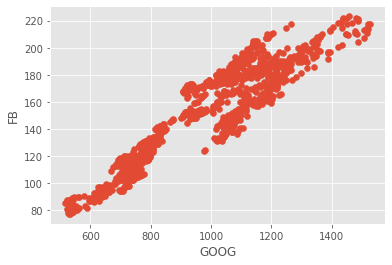

In [42]:
matplotlib.style.use('ggplot')

plt.scatter(x, y)
plt.xlabel('GOOG')
plt.ylabel('FB')
plt.show()


In [80]:
x1=correlation('ELF1')
y1=correlation('SPB1')
#y1=correlation('REV1')
#y1=correlation('CL1')
np.corrcoef(x1, y1)



array([[1.        , 0.77814056],
       [0.77814056, 1.        ]])

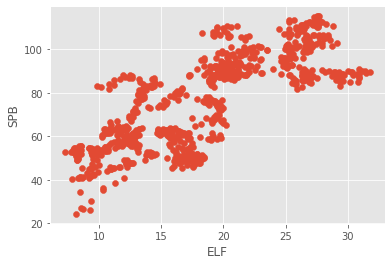

In [81]:
matplotlib.style.use('ggplot')
plt.scatter(x1, y1)
plt.xlabel('ELF')
plt.ylabel('SPB')
plt.show()

In [101]:
x2=correlation('LW1')
#y2=correlation('WMT1')  #0.83
#y2=correlation('WILC1')  #0.7
#y2=correlation('SYY1') #0.879
y2=correlation('CHEF1') #0.892
np.corrcoef(x2, y2)

array([[1.      , 0.892804],
       [0.892804, 1.      ]])

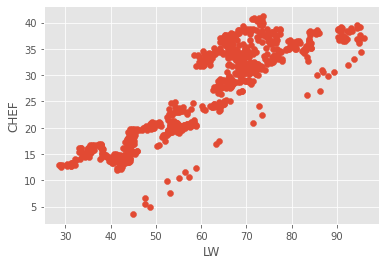

In [103]:
matplotlib.style.use('ggplot')
plt.scatter(x2, y2)
plt.xlabel('LW')
plt.ylabel('CHEF')
plt.show()

In [106]:
x3=correlation('WORK1')
y3=correlation('MARK1')
#y1=correlation('REV1')
#y1=correlation('CL1')
np.corrcoef(x3, y3)

array([[1.        , 0.40651514],
       [0.40651514, 1.        ]])

In [0]:
#problem 2 using daily log return
mu=np.zeros(15)
names=['CAT','DIA','HD','MSFT','NKE','NVDA','PG','TM','VIG','VOO','WMT','GOOG','CHEF','SPB','ORCL']
def getData(n=None):
    Is=[i for i in range(15)]
    Rows=[]
    for name,i in zip(names,Is):
        with open(name+'.csv') as file:
            reader=csv.reader(file)
            rows=[row[2] for row in reader]
        mu[i]=np.mean([float(row) for row in rows[1:n]])
        Rows.append([float(row) for row in rows[1:n]])
    Omega=np.cov(np.array(Rows))
    return mu,Omega

In [0]:
#problem 2 using monthly log return
mu_m=np.zeros(15)
names_2=['CAT_2','DIA_2','HD_2','MSFT_2','NKE_2','NVDA_2','PG_2','TM_2','VIG_2','VOO_2','WMT_2','GOOG_2','CHEF_2','SPB_2','ORCL_2']
def getData_m(n=None):
    Is=[i for i in range(15)]
    Rows=[]
    for name,i in zip(names,Is):
        with open(name+'.csv') as file:
            reader=csv.reader(file)
            rows=[row[2] for row in reader]
        mu_m[i]=np.mean([float(row) for row in rows[1:n]])
        Rows.append([float(row) for row in rows[1:n]])
    Omega_m=np.cov(np.array(Rows))
    return mu_m,Omega_m

In [0]:
#linearized loss mean&variance
def lin_loss(Vt,Wt,mu,omega):
  exp=-Vt*(np.dot(Wt,mu))
  var=(Vt**2)*(np.dot(np.dot(Wt,omega),Wt))
  return exp,var

In [0]:
'''
def loss(Vt,Wt,mu,omega):
  exp=-Vt*(np.dot(Wt,np.exp(mu))-np.dot(mu,np.ones(11)))
  var=(Vt**2)*(np.dot(np.dot(Wt,omega),Wt))
  return exp,var

In [50]:
#linearized loss using daily log return *12
mu_d=np.array(getData(1006)[0])*21     #1007 20151231 1/1 LOG RETURN
omega_d=np.array(getData(1006)[1])*21
vt=193.664                   #20151231 portfolio value
wt=np.ones(15)*1/15
a=lin_loss(vt,wt,mu_d,omega_d)
exp=a[0]
var=a[1]
print(exp)
print(var)


-2.3838959613167976
53.766587179265485


In [64]:
#linearized loss using monthly log return
mu_m=np.array(getData_m(49)[0])    #first four year monthly log return
omega_m=np.array(getData_m(49)[1])
#print(omega)
vt=193.664                           #20151231 portfolio value
wt=np.ones(15)*1/15
b=lin_loss(vt,wt,mu_m,omega_m)
exp_m=b[0]
var_m=b[1]
print(exp_m)
print(var_m)

-0.46592309390524433
1.3524214807257802


In [0]:
def normfun(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

In [0]:
'''
with open('loss.csv') as file:
      reader=csv.reader(file)
      rows=[row[1] for row in reader]
      #print(rows)
      mu_loss=np.mean([float(row) for row in rows[1:1008]] )
      variance=np.var([float(row) for row in rows[1:1008]])
      

Text(0.5, 1.0, 'pdf of linearized loss distribution using theoretical monthly log return')

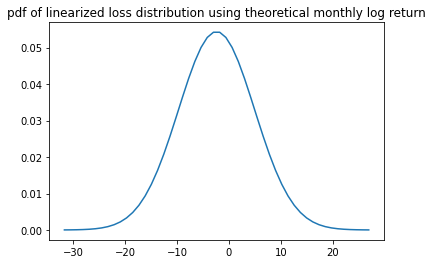

In [66]:
x = np.linspace (exp-4*np.sqrt(var), exp+4*np.sqrt(var))
y = normfun(x, exp, np.sqrt(var))
plt.plot(x,y)
plt.title('pdf of linearized loss distribution using theoretical monthly log return')


Text(0.5, 1.0, 'cdf of linearized loss distribution using theoretical monthly daily log return')

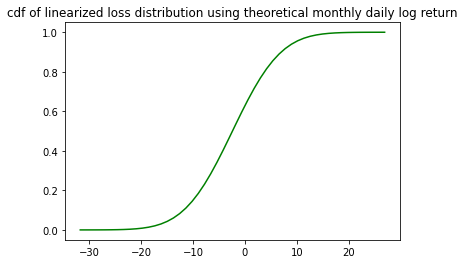

In [67]:
plt.plot(x, norm.cdf (x, exp, np.sqrt(var)),'g')
plt.title('cdf of linearized loss distribution using theoretical monthly daily log return')

Text(0.5, 1.0, 'pdf of linearized loss distribution using monthly log return')

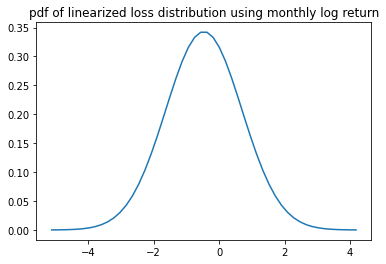

In [55]:
x_m = np.linspace (exp_m-4*np.sqrt(var_m), exp_m+4*np.sqrt(var_m))
y_m = normfun(x_m, exp_m, np.sqrt(var_m))
plt.plot(x_m,y_m)
plt.title('pdf of linearized loss distribution using monthly log return')

In [0]:
#48  ??????????

Text(0.5, 1.0, 'cdf of linearized loss distribution using monthly log return')

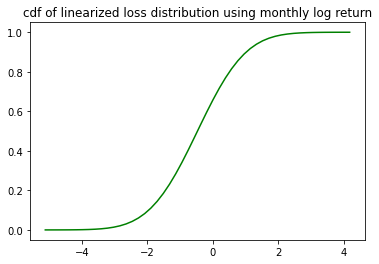

In [56]:
plt.plot(x_m, norm.cdf (x_m, exp_m, np.sqrt(var_m)),'g')
plt.title('cdf of linearized loss distribution using monthly log return')

In [26]:
#loss distribution
Names=['loss1']
for name in Names:
    with open(name+'.csv') as file:
        reader=csv.reader(file)
        rows=[row for row in reader]
    DApp=[row[1] for row in rows[1:49]]
    DApp=[float(dapp) for dapp in DApp]
   #DApp=[math.log(DApp[i]/DApp[i-1]) for i in range(1,len(DApp))]
    DApp=sorted(DApp)
    DApp=np.array(DApp)
    mu_loss,sigma_loss=norm.fit(DApp)
    #_,p=chisquare(DApp,norm(mu,sigma).pdf(np.linspace(-50,50,251)))
    #print('The p value for '+name+' is %f'%p)
    print(mu_loss,sigma_loss)
    #print(sigma)
    #mu_t,sigma_t,n=t.fit(DApp)


-1.9513340893958333 4.744931572379759


Text(0.5, 1.0, 'pdf of  loss distribution')

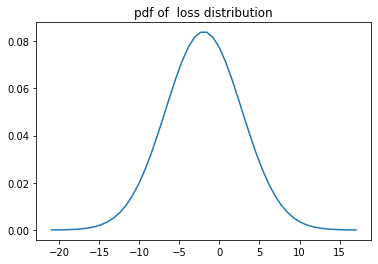

In [27]:
#x_loss = np.arange(-0.002,0.0001,0.00001) 
x_loss=np.linspace (mu_loss-4*sigma_loss, mu_loss+4*sigma_loss)
y_loss = normfun(x_loss, mu_loss, sigma_loss)
plt.plot(x_loss,y_loss)
#plt.hist(DApp,bins=48,density='true')
plt.title('pdf of  loss distribution')

Text(0.5, 1.0, 'cdf of  loss distribution')

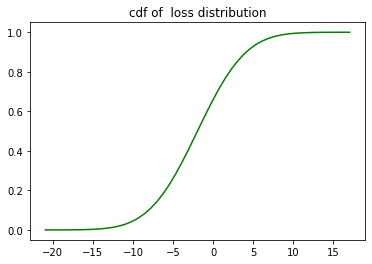

In [28]:
plt.plot(x_loss, norm.cdf (x_loss,mu_loss,sigma_loss),'g')
plt.title('cdf of  loss distribution')

In [0]:
# t-distribution

In [29]:
np.random.seed(1)
ks = t.fit(DApp)
df = ks[0] #degree of freedom
print(df) 
loc = ks[1] #mean
print(loc) 
scale = ks[2] #sigma
print(scale)
ks2 = t.rvs(df=df,loc=loc,scale=scale,size=len(DApp))
ss.ks_2samp(DApp,ks2)

12.151263207528679
-2.039464974048821
4.3464661754019795


Ks_2sampResult(statistic=0.16666666666666666, pvalue=0.5220694941428086)

Text(0.5, 1.0, 'pdf of T-Distribution')

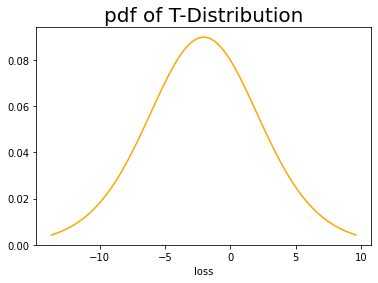

In [30]:
plt.figure()
TDistribution = ss.t(ks[0],ks[1],ks[2])
x = np.linspace(TDistribution.ppf(0.01), TDistribution.ppf(0.99), 100)
plt.plot(x, TDistribution.pdf(x),c='orange')
plt.xlabel('loss')
plt.title('pdf of T-Distribution',size=20)



Text(0.5, 1.0, 'cdf of T-Distribution')

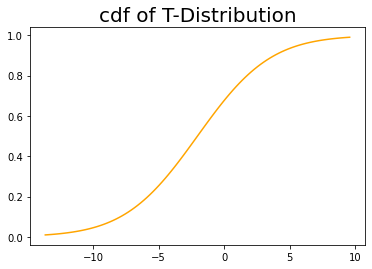

In [31]:
plt.plot(x, TDistribution.cdf(x),c='orange')
plt.title('cdf of T-Distribution',size=20)

In [0]:
#problem3

In [0]:
with open('loss.csv') as file:
      reader=csv.reader(file)
      values=[row[0] for row in reader]
      values_future=[float(row)*100 for row in values[1007:2013]]
      #print(values_future)
      

In [0]:
with open('loss.csv') as file:
      reader=csv.reader(file)
      log_returns=[row[2] for row in reader]
      log_returns_future=[float(row) for row in log_returns[1007:2013]]
      #print(log_returns_future)

No handles with labels found to put in legend.


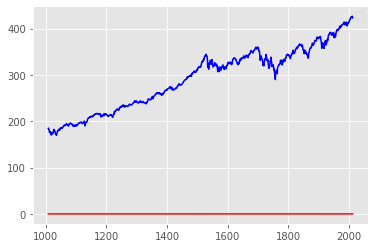

In [123]:
X=np.arange(1008,2013,1)
plt.plot(X,values_future,'b')
plt.plot(X,log_returns_future,'r')
plt.legend()

In [0]:
'''
x = np.arange(-0.05, 0.125, 0.005)

y = TDistribution.cdf(x)

plt.plot(x, y)

sorted_ = np.sort(DApp)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

x_label = t.ppf(yvals)
plt.scatter(x_label, sorted_)

ss.probplot(DApp, dist="t", plot=plt)
print('QQ plot for t distribution')
plt.show()

In [0]:
#3(d) rolling window for linearized loss using daily log return
mu2=np.zeros(15)
names=['CAT','DIA','HD','MSFT','NKE','NVDA','PG','TM','VIG','VOO','WMT','GOOG','CHEF','SPB','ORCL']
def getData1(M):
    Is=[i for i in range(15)]
    Rows=[]
    for name,i in zip(names,Is):
        with open(name+'.csv') as file:
            reader=csv.reader(file)
            rows=[row[2] for row in reader]
        mu2[i]=np.mean([float(row) for row in rows[1+21*M:1006+21*M]])
        Rows.append([float(row) for row in rows[1+21*M:1006+21*M]])
    Omega=np.cov(np.array(Rows))
    return mu2,Omega

In [35]:
#monthly portfolio value
Names=['loss1']
for name in Names:
    with open(name+'.csv') as file:
        reader=csv.reader(file)
        rows=[row for row in reader]
    PORT_VAL=[row[2] for row in rows[49:97]]
    PORT_VAL=[float(p) for p in PORT_VAL]
    #mu_loss,sigma_loss=norm.fit(DApp)
    #_,p=chisquare(DApp,norm(mu,sigma).pdf(np.linspace(-50,50,251)))
    #print('The p value for '+name+' is %f'%p)
    print(PORT_VAL)
    


[185.8372801, 189.4363011, 204.7958556, 200.6999925, 202.6999237, 204.3859601, 217.2896762, 216.7893481, 217.2091982, 214.2848155, 225.8997708, 233.0200538, 239.7364791, 244.7483331, 247.0493538, 252.7766285, 263.1697073, 261.720672, 271.0363406, 274.3368498, 281.6257446, 297.3142745, 308.5362319, 313.9611082, 337.5420449, 322.5005442, 315.6262185, 309.0157522, 321.9877585, 325.3686987, 338.3742603, 349.878541, 358.2632455, 328.904091, 329.8702749, 303.5400339, 328.1753954, 337.111468, 344.868835, 361.3181735, 331.9520943, 360.2123632, 368.1655939, 370.4713798, 382.5458586, 385.241352, 402.6442492, 413.2263443]


In [0]:
#3(d) rolling window for linearized loss using monthly log return
mu2_m=np.zeros(15)
names_2=['CAT_2','DIA_2','HD_2','MSFT_2','NKE_2','NVDA_2','PG_2','TM_2','VIG_2','VOO_2','WMT_2','GOOG_2','CHEF_2','SPB_2','ORCL_2']
def getData1_m(M):
    Is=[i for i in range(15)]
    Rows=[]
    for name,i in zip(names_2,Is):
        with open(name+'.csv') as file:
            reader=csv.reader(file)
            rows=[row[0] for row in reader]
        mu2_m[i]=np.mean([float(row) for row in rows[1+M:49+M]])
        Rows.append([float(row) for row in rows[1+M:49+M]])
    Omega=np.cov(np.array(Rows))
    return mu2_m,Omega

52.669286028353476
56.56389534482524
65.91064486676551
62.803589591190416
63.089062494729184
64.78256081265378
71.66747732952268
70.63434274310819
71.8939493797352
68.95005532760082
76.08444157570884
80.15882563037977
84.38729610213365
87.96629948220563
88.94382868936584
91.95837214091867
99.43515217317416
97.02124160275314
103.72831919096961
105.9081838667164
110.8280660183172
121.78888104006965
132.23297658883484
135.8787349508362
155.33995189448459
155.43541730234963
156.2363993229621
150.41668043668454
165.3046473606484
169.0209066529619
183.8648603875498
196.80563124589153
204.06897432884676
180.88003857545263
190.9450377529475
171.17445420076035
200.36806040223675
212.56469490477033
222.51358664082483
242.74488356927392
209.70155667294503
245.85336932024333
258.95129245900546
253.75360856003505
265.28263444637287
269.3632994245218
290.0408075755569


ValueError: ignored

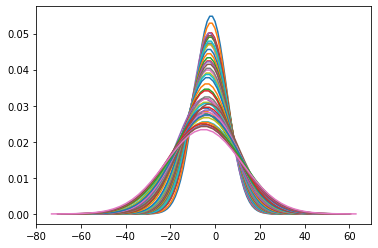

In [59]:
#rolling window for linearized loss using daily log return 
for M in range(48):
  data3= getData1(M+1)
  mu3=data3[0]*21
  omega3=data3[1]*21
  vt=PORT_VAL[M]
  a3=lin_loss(vt,wt,mu3,omega3)
  #print(a3[0])
  print(a3[1])
  x = np.linspace (a3[0]-4*np.sqrt(a3[1]), a3[0]+4*np.sqrt(a3[1]))
  y = normfun(x, a3[0], np.sqrt(a3[1]))
  plt.plot(x,y)
  

34.494197947572
35.31211743105004
44.86380820281199
43.09843797064826
39.12527974181669
38.602223071110075
45.909383706900925
45.92382051210818
46.19373791848181
44.37706495557115
50.89047675216906
54.414923467587556
55.75832184270147
58.04883893188524
59.15450402822887
60.528401562831704
66.4384188205634
64.14747231859039
68.87270898081928
70.41535116201905
73.37674652823198
83.41412915323153
89.38868876408303
92.34341406515756
107.73690033878127
105.38118691462529
103.15793140354644
101.3633168439977
111.76319461601622
114.0920312725913
121.08589716229184
126.10441459039897
130.50639129776587
133.31570445534044
133.26475189782454
130.10742686345046
153.750963013254
160.14913460107616
166.99359173152033
186.08930709390228
179.6178040752533
222.78209159599095
232.93079809401272
223.04772465749923
236.53994630900075
225.77666434290228
247.09658979456694
257.7919004250928


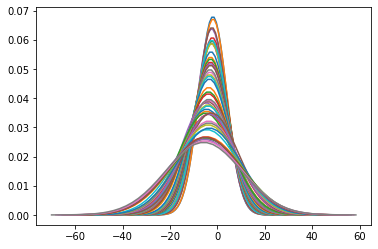

In [63]:
#rolling window for linearized loss using monthly log return 
for M in range(48):
  data3_m= getData1_m(M+1)
  mu3_m=data3_m[0]
  omega3_m=data3_m[1]
  vt=PORT_VAL[M]
  a3_m=lin_loss(vt,wt,mu3_m,omega3_m)
  #print(a3_m[0])
  print(a3_m[1])
  x = np.linspace (a3_m[0]-4*np.sqrt(a3_m[1]), a3_m[0]+4*np.sqrt(a3_m[1]))
  y = normfun(x, a3_m[0], np.sqrt(a3_m[1]))
  plt.plot(x,y)

In [0]:
#rolling window for t distribution
def getData2(M):
  Names=['loss1']
  for name in Names:
    with open(name+'.csv') as file:
        reader=csv.reader(file)
        rows=[row for row in reader]
    Loss=[row[1] for row in rows[1+M:49+M]]
    Loss=[float(l) for l in Loss]
    Loss=sorted(Loss)
    Loss=np.array(Loss)
    mu_loss,sigma_loss=norm.fit(Loss)
    np.random.seed(1)
    ks = t.fit(Loss)
    df = ks[0]
    loc = ks[1]
    scale = ks[2]
    T=[df,loc,scale]
    #print(mu_loss,sigma_loss)
    return T
    


In [45]:
for M in range(48):
  L=getData2(M)
  
  print(L)

[12.151263207528679, -2.039464974048821, 4.3464661754019795]
[18.8778042399519, -1.7187688815598823, 4.6456986922762695]
[18.14009896852298, -1.7111086668508424, 4.631129133208654]
[10.9131339982025, -1.9014162041922678, 4.786333623825762]
[13.586719710391487, -1.8565674046111105, 4.918062216580147]
[7.744095609476561, -2.0573793645676197, 4.492700312402205]
[6.354411701189604, -1.949267511138081, 4.3128920736835745]
[8.378267904235642, -2.1094020177095967, 4.722816076790739]
[9.243627341704483, -2.021186057753047, 4.792981918844287]
[9.62316375315705, -1.9824429040047544, 4.820398215745531]
[9.852636780581847, -1.978950897503171, 4.837334790323696]
[43.151726137634384, -2.2368448016159768, 5.427845039826098]
[1491107.9376484286, -2.3938924519350357, 5.594933973374532]
[924138.908653806, -2.3958146233360615, 5.5963282523595215]
[2920096.427439969, -2.441122440826317, 5.608525420852386]
[3139866.8062784187, -2.451707934914933, 5.60789328490903]
[1435110.405925693, -2.4426024173523113, 5

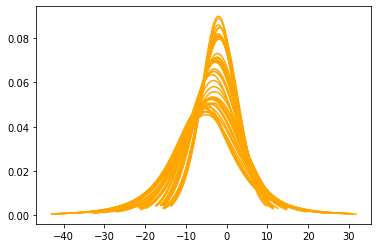

In [46]:
for M in range(48):
  L=getData2(M)
  TDistribution = ss.t(L[0],L[1],L[2])
  x = np.linspace(TDistribution.ppf(0.01), TDistribution.ppf(0.99), 100)
  plt.plot(x, TDistribution.pdf(x),c='orange')
  # T-distri shift to left, close to normal distri

In [0]:
'''
for M in range(48):
  np.random.seed(1)
  ks = t.fit(DApp)
  df = ks[0]
#print(df)
loc = ks[1]
#print(loc)
scale = ks[2]
#print(scale)
ks2 = t.rvs(df=df,loc=loc,scale=scale,size=len(DApp))
ss.ks_2samp(DApp,ks2)

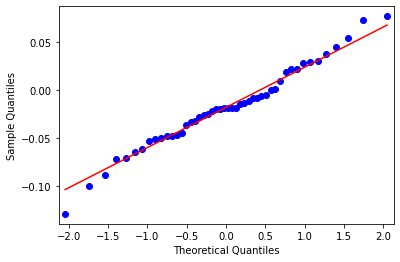

In [0]:
import pylab
sm.qqplot(DApp, line='s')
pylab.show()

In [0]:
#t-distribution var cvar